# Ridge Regression

Our goal is to learn about Ridge Regression. 
This technique is closely related to standard linear regression, but adds an extra twist.
The twist involves including an additional term in our minimization of sums of squares that encourages coefficients to shrink.

The idea behind ridge regression is that influencing coefficients to shrink towards zero will also discourage overfitting to our training data.
If we can prevent overfitting than we can better generalize our model to yet uncollected data.


## Mechanics

We saw in previous lectures that finding optimal coefficients in a linear regression is the same as minimizing the sum squares error.
More concretely, give a set of observations $(x,y)_{1},(x,y)_{2},\cdots,(x,y)_{N}$ we can write our probabilistic model as 

$$
    p(y|x) \sim N( \beta_{0} + \beta'x , \sigma^2)
$$

where $\beta_{0}$ is an intercept.

The optimal $\beta$ parameters are found by minimizing the following function of $\beta$

$$
\min_{\beta} \left\{ \sum_{i=1}^{N} \left( y_{i} - \beta_{0} - \beta'x_{i} \right)^{2}  \right\}
$$

Ridge regression adds an additional term to the above optimization problem

$$
\min_{\beta} \left\{ \sum_{i=1}^{N} \left( y_{i} - \beta_{0} - \beta'x_{i} \right)^{2}  \right\} + \lambda \sum_{m=1}^{M} \beta_{m}^{2}
$$

The $\lambda$ parameter is a choice on part of the investigator.
Typically, $\lambda$ is chosen by cross-validation.

This additional term penalizes coefficients related to covariates. 
Ridge regression does **not** penalize the size of the intercept.

## Optimal $\beta$

We can solve our optimization problem by taking partial derivatives and finding the $\beta$ that zeros out these derivatives.

$$
f(\beta) = \sum_{i=1}^{N} \left( y_{i} - \beta_{0} - \beta'x_{i} \right)^{2} + \lambda \sum_{m=1}^{M} \beta_{m}^{2}
$$

The partial derivative with respect to $\beta_{m}$ is 
\begin{align}
\frac{ d f}{d\beta_{m}} = \sum_{i=1}^{N} -2 x_{m} \left( y_{i} - \beta_{0} - \beta'x_{i} \right) + 2 \lambda \beta_{m}
\end{align}

We set the derivative equal to zero and solve for $\beta_{m}$.

\begin{align}
     \sum_{i=1}^{N} x_{im} \left( y_{i} - \beta_{0} - \beta'x_{i} \right) - \lambda \beta_{m} &=0\\
     \sum_{i=1}^{N} x_{im} y_{i} - \sum_{i=1}^{N}x_{im} ( \beta_{0} + \beta'x_{i} )- \lambda \beta_{m} &=0\\
     \sum_{i=1}^{N} x_{im} y_{i} &= \sum_{i=1}^{N}x_{im} ( \beta_{0} + \beta'x_{i} ) + \lambda \beta_{m}\\
\end{align}


\begin{align}
    x_{m}^{'} y &=   x_{m}^{'} (X + \lambda 1_{m}) \beta
\end{align}

where $1_{m}$ is a vector of zeros everywhere and a 1 in the m$^{th}$ position.
The set of all optimal betas is then

$$
    X'y = (X'X + \lambda I) \beta
$$

and the optimal $\beta$ for ridge regression is

$$
    \beta_{\text{RR}} = (X'X + \lambda I)^{-1} X'y
$$

This vector of $\beta$s does not include the intercept.

# LASSO

LASSO works similarly to ridge regression.
The goal again is to optimize the typical SSE with an additional term

$$
\min_{\beta} \left\{ \sum_{i=1}^{N} \left( y_{i} - \beta_{0} - \beta'x_{i} \right)^{2}  \right\} + \lambda \sum_{m=1}^{M} |\beta_{m}|
$$

The additional term is the sum of the absolute value of $\beta$s, not including the intercept.

Though a subtle difference, we can not solve for the optimal $\beta$s exactly.
A numerical solver capable of convex optimization can provide an estimate of the optimal $\beta$s for lasso.  


The absolute value constraint put on the sum of coefficients is stronger than the squared coefficients in ridge regression.
This additional pressure to shrink estimates serves as a natural way to, among many candidate coefficients, find a subset that best predict the target variable $y$.


## Example data

The example data set is a collection of information about baseball players.
The data contains, for each baseball player, information about their performance and how much money they make.

Our goal will be to understand the relationship between a baseball player's performance and their salary.

To generalize from this subset to other baseball players we did not collect data on, ridge regression will be used.
Ridge regression will penalize over emphasizing specific covariates that could cause us to overfit to our training data.
We can also fit a LASSO model to our training data.
LASSO will shrink covariate estimates to zero if they do not substantially contribute to reducing the SSE.
LASSO aims to create a more parsimonious model, and by doing so, create a model that can better generalize from training to testing data.


                  AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun
-Alan Ashby         315   81     7   24  38    39    14   3449   835     69
-Alvin Davis        479  130    18   66  72    76     3   1624   457     63
-Andre Dawson       496  141    20   65  78    37    11   5628  1575    225
-Andres Galarraga   321   87    10   39  42    30     2    396   101     12
-Alfredo Griffin    594  169     4   74  51    35    11   4408  1133     19
-Al Newman          185   37     1   23   8    21     2    214    42      1
                  CRuns CRBI CWalks League Division PutOuts Assists Errors
-Alan Ashby         321  414    375      N        W     632      43     10
-Alvin Davis        224  266    263      A        W     880      82     14
-Andre Dawson       828  838    354      N        E     200      11      3
-Andres Galarraga    48   46     33      N        E     805      40      4
-Alfredo Griffin    501  336    194      A        W     282     421     25
-Al Newman        

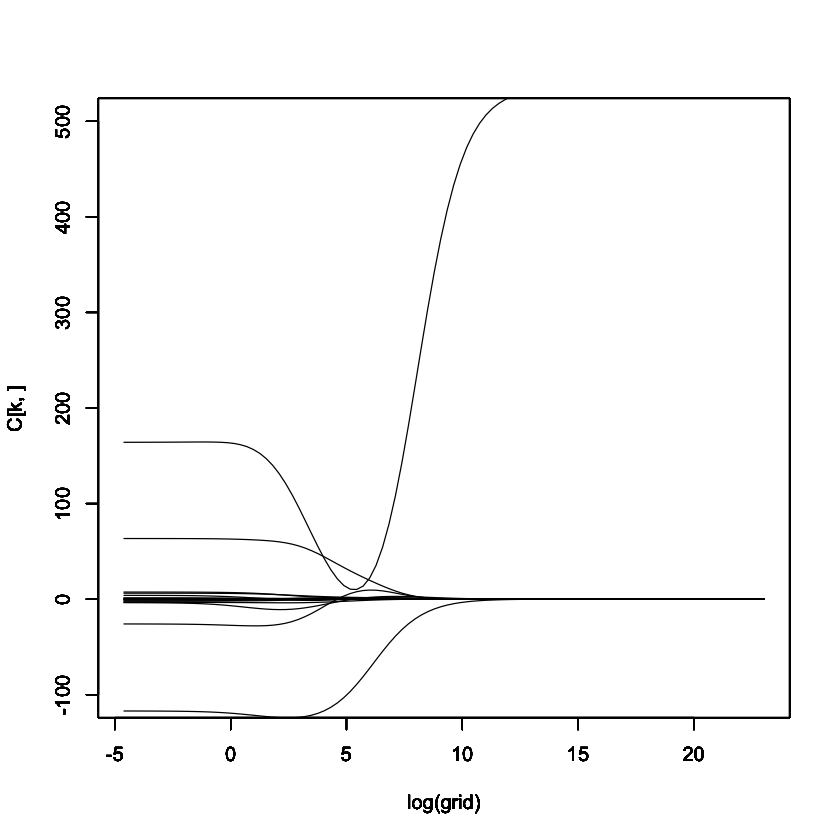

In [56]:
library(ISLR)
library(glmnet)
library(dplyr)
library(tidyr)

# Hitters dataset
Hitters = na.omit(Hitters)
print(head(Hitters))

# Take covariates except Salary
x = model.matrix(Salary~., Hitters)[,-1]

# Take salary variable
y = Hitters$Salary

# Ridge regression can be fit with the glmnet function.
# This function takes a matrix of covariates, the target variable.
# Setting alpha=0 specifies Ridge regression and Lambda corresponds the the amount of covariate "shrinkage"
grid = 10^seq(10, -2, length = 100)
ridge_mod = glmnet(x, y, alpha = 0, lambda = grid)

C = coef(ridge_mod)
for (k in 1:nrow(C)){
    plot( log(grid),  C[k,], type='l', ylim=c(-100,500))
    par(new=TRUE)
}

In [63]:
cat("Lambda")
ridge_mod$lambda[60]
coef(ridge_mod)[,60]

cat("SSE")
sqrt(sum(coef(ridge_mod)[-1,60]^2))

cat("Lambda")
ridge_mod$lambda[50]
coef(ridge_mod)[,50]

cat("SSE")
sqrt(sum(coef(ridge_mod)[-1,50]^2))

Lambda

[1] 705.4802

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 54.32519950   0.11211115   0.65622409   1.17980910   0.93769713   0.84718546 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.31987948   2.59640425   0.01083413   0.04674557   0.33777318   0.09355528 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.09780402   0.07189612  13.68370191 -54.65877750   0.11852289   0.01606037 
      Errors   NewLeagueN 
 -0.70358655   8.61181213

SSE

[1] 57.11001

Lambda

[1] 11497.57

(Intercept)         AtBat          Hits         HmRun          Runs 
407.356050200   0.036957182   0.138180344   0.524629976   0.230701523 
          RBI         Walks         Years        CAtBat         CHits 
  0.239841459   0.289618741   1.107702929   0.003131815   0.011653637 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
  0.087545670   0.023379882   0.024138320   0.025015421   0.085028114 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
 -6.215440973   0.016482577   0.002612988  -0.020502690   0.301433531

SSE

[1] 6.360612

In [67]:
# The same process used for Ridge Regression can be used to fit LASSO.
# The only change is specifying alpha=1.
grid = 10^seq(10, -2, length = 100)
ridge_mod = glmnet(x, y, alpha = 1, lambda = grid)

cat("Lambda")
ridge_mod$lambda[90]
coef(ridge_mod)[,90]
sqrt(sum(coef(ridge_mod)[-1,90]^2))

cat("Lambda")
ridge_mod$lambda[80]
coef(ridge_mod)[,80]
sqrt(sum(coef(ridge_mod)[-1,80]^2))

cat("Lambda")
ridge_mod$lambda[70]
coef(ridge_mod)[,70]
sqrt(sum(coef(ridge_mod)[-1,70]^2))


Lambda

[1] 0.1629751

(Intercept)         AtBat          Hits         HmRun          Runs 
 1.624716e+02 -2.007255e+00  7.468343e+00  3.501804e+00 -2.158804e+00 
          RBI         Walks         Years        CAtBat         CHits 
-7.418552e-01  6.159502e+00 -4.693678e+00 -1.403636e-01  8.438549e-02 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
-8.593583e-03  1.396716e+00  7.241024e-01 -8.100533e-01  5.970530e+01 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-1.167120e+02  2.831003e-01  3.542424e-01 -3.253451e+00 -2.207552e+01

[1] 133.51

Lambda

[1] 2.656088

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 124.0894873   -1.5600984    5.6931685    0.0000000    0.0000000    0.0000000 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
   4.7505395   -9.5180241    0.0000000    0.0000000    0.5191611    0.6604074 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.3915415   -0.5326868   32.1125493 -119.2583540    0.2726207    0.1748164 
      Errors   NewLeagueN 
  -2.0567432    0.0000000

[1] 124.126

Lambda

[1] 43.28761

(Intercept)       AtBat        Hits       HmRun        Runs         RBI 
 74.7044627   0.0000000   1.6432866   0.0000000   0.0000000   0.0000000 
      Walks       Years      CAtBat       CHits      CHmRun       CRuns 
  1.8986354   0.0000000   0.0000000   0.0000000   0.0000000   0.1837056 
       CRBI      CWalks     LeagueN   DivisionW     PutOuts     Assists 
  0.3743196   0.0000000   0.0000000 -55.4369609   0.1519453   0.0000000 
     Errors  NewLeagueN 
  0.0000000   0.0000000

[1] 55.49557